In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

plt.rcParams['savefig.bbox'] = 'tight'  # 保存图片时布局紧凑


def show_image(images, title=None):
    """
    显示图片
    """
    if not isinstance(images, list):
        images = [images]
    # figure 表示整个图形，axes 表示包含每个子图坐标轴的数组，squeeze=False 表示始终返回一个二维数组
    figure, axes = plt.subplots(ncols=len(images), squeeze=False)

    # 显示图片
    for i, _image in enumerate(images):
        _image = _image.detach()
        _image = F.to_pil_image(_image)
        axes[0, i].imshow(np.asarray(_image))
        axes[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    # 设置标题
    if title:
        figure.suptitle(title)

TypeError: all() received an invalid combination of arguments - got (axis=int, out=NoneType, ), but expected one of:
 * ()
 * (tuple of ints dim, bool keepdim)
      didn't match because some of the keywords were incorrect: axis, out
 * (int dim, bool keepdim)
      didn't match because some of the keywords were incorrect: axis, out
 * (name dim, bool keepdim)
      didn't match because some of the keywords were incorrect: axis, out


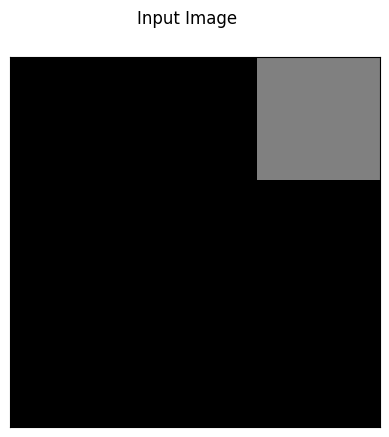

In [2]:
# 输入
image = torch.Tensor([[[0, 0, 128],
                       [0, 0, 0],
                       [0, 0, 0]],
                      [[0, 0, 128],
                       [0, 0, 0],
                       [0, 0, 0]],
                      [[0, 0, 128],
                       [0, 0, 0],
                       [0, 0, 0]]]
                     )
image = image.permute([1, 2, 0])  # 转换为 HWC 格式
color = torch.Tensor([128, 128, 128])
show_image(image, title='Input Image')

# 不使用对每个元素进行比较的方法计算
mask = np.all(image == color, axis=-1)

# 输出
print(mask)